In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

In [3]:
q=pd.read_csv('Questions.csv', encoding='latin-1')
t=pd.read_csv('Tags.csv')
qnum=q.shape[0]
tnum=(t.groupby('Tag').nunique()).shape[0]
print(qnum)
print(tnum)

1264216
37034


Text(0.5,0,'Tag number')

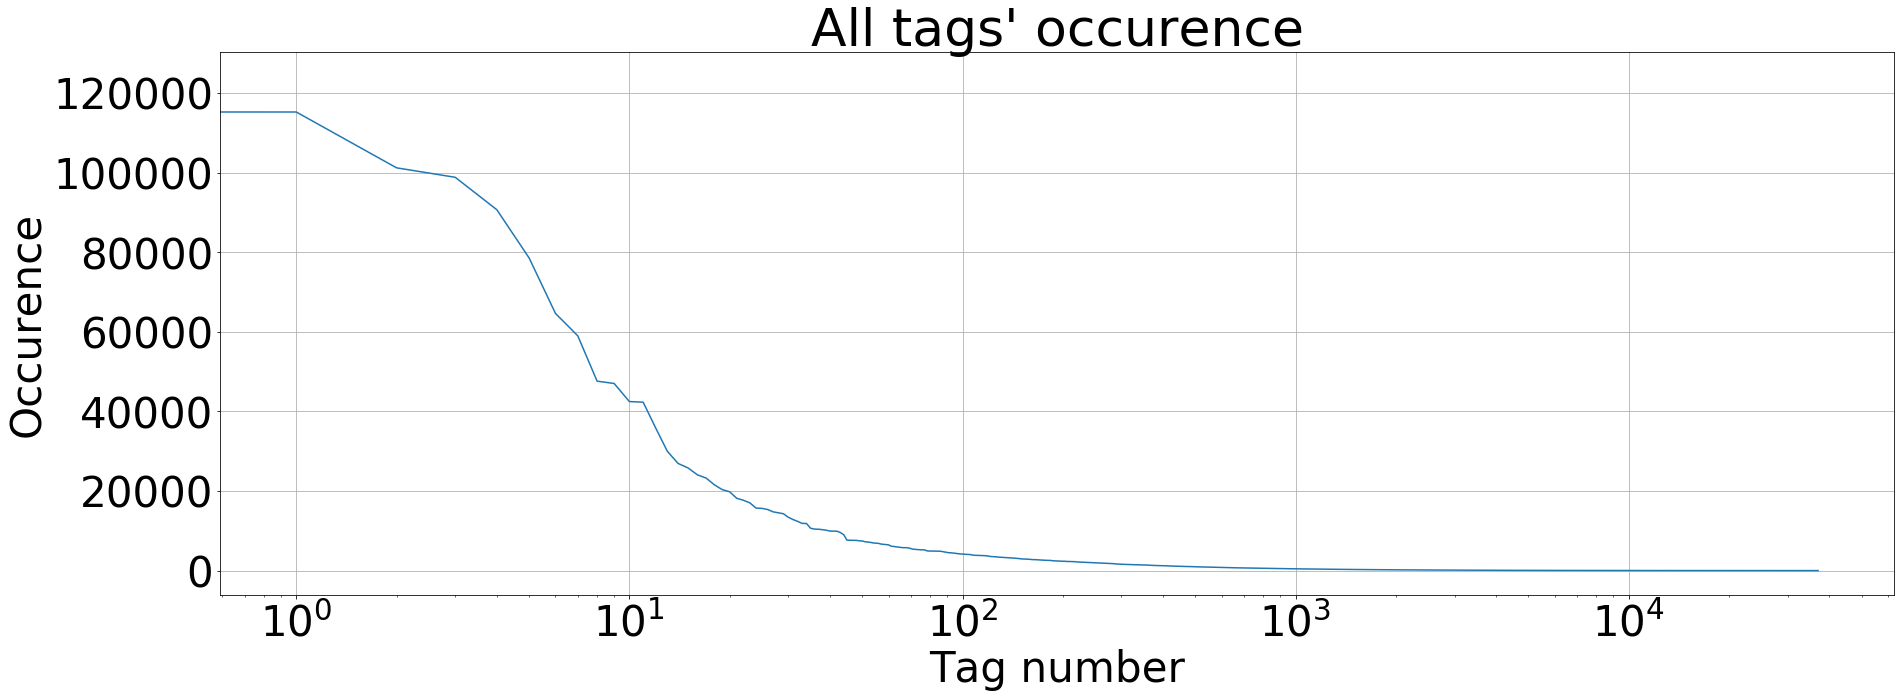

In [4]:
# getting infomatics from the dataset
n=tnum
tagCount =  collections.Counter(list(t['Tag'])).most_common(n)
tagCountnp=np.array(tagCount)
tagCountnp.reshape(n,2)
tagCountpd=pd.DataFrame(tagCountnp)
tagCountpd.columns=['tag', 'count']
tagCountpd['count']=(tagCountpd['count']).astype(int)
# logplot all tags' occurence 
tagCountpd.plot(x='tag', y='count', kind='line', legend=False, grid=True, figsize=(30, 10),fontsize=42)
plt.xscale('log')
plt.title("All tags' occurence", fontsize=52)
plt.ylabel('Occurence', fontsize=42)
plt.xlabel('Tag number', fontsize=42)

Text(0.5,0,'Tag')

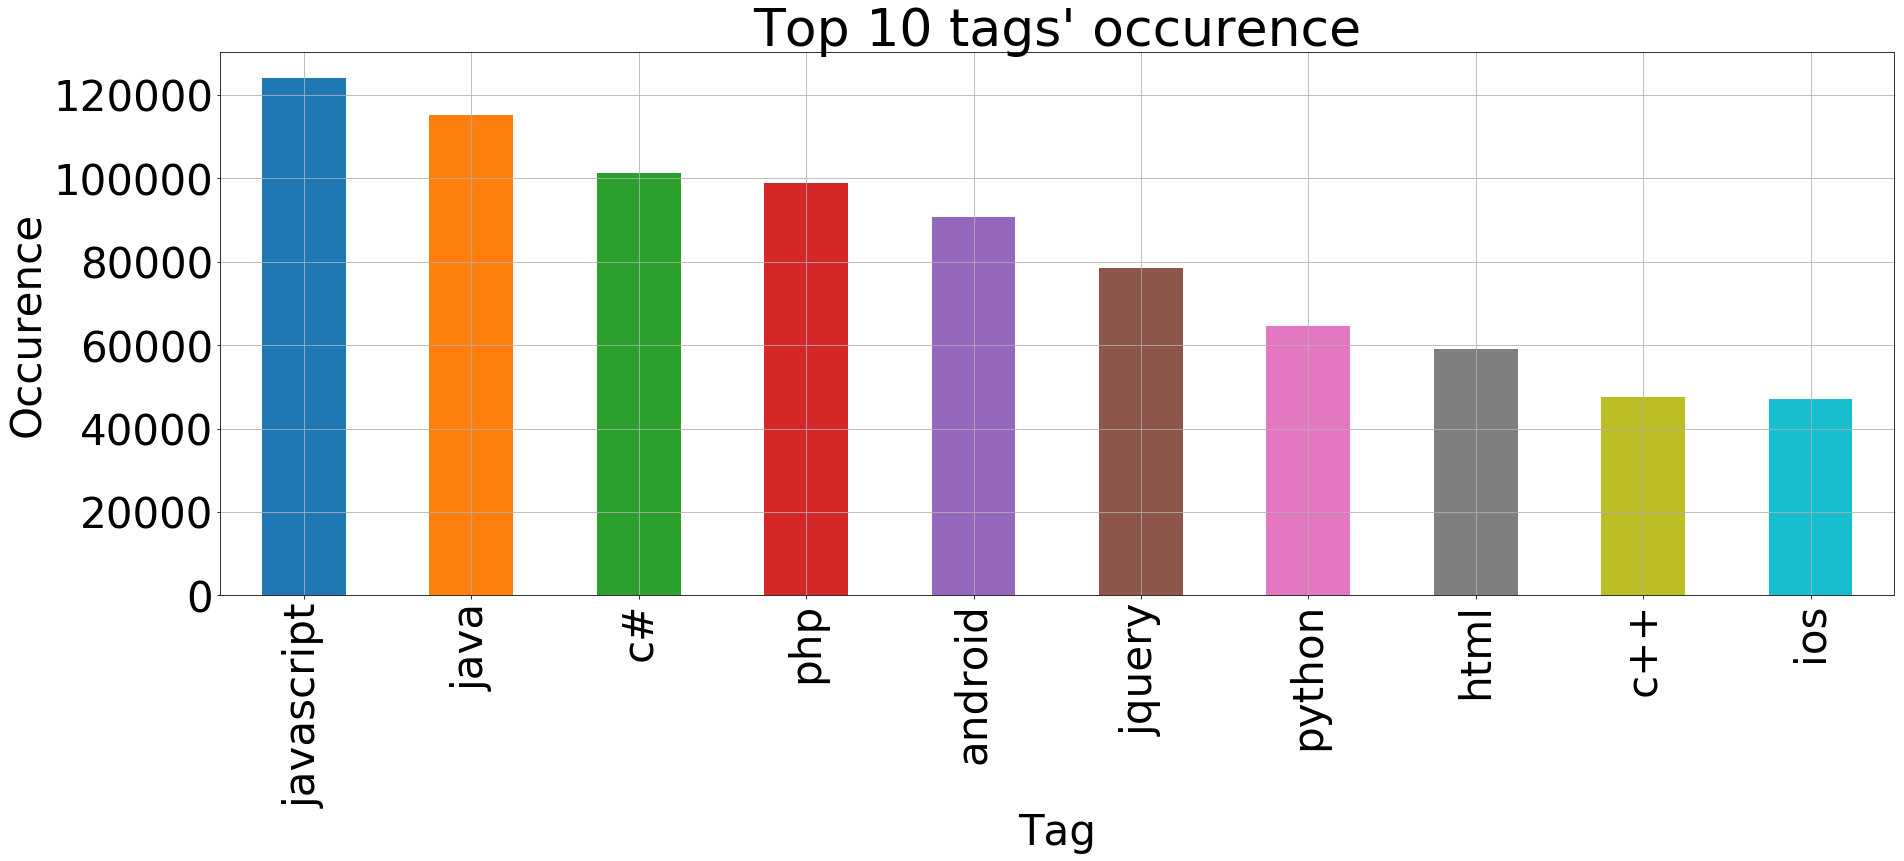

In [6]:
# getting infomatics from the dataset
n=10
tagCount =  collections.Counter(list(t['Tag'])).most_common(n)
tagCountnp=np.array(tagCount)
tagCountnp.reshape(n,2)
tagCountpd=pd.DataFrame(tagCountnp)
tagCountpd.columns=['tag', 'count']
tagCountpd['count']=(tagCountpd['count']).astype(int)
# plot the top 10 tags' occurence 
tagCountpd.plot(x='tag', y='count', kind='bar', legend=False, grid=True, figsize=(30, 10),fontsize=42)
plt.title("Top 10 tags' occurence", fontsize=52)
plt.ylabel('Occurence', fontsize=42)
plt.xlabel('Tag', fontsize=42)

In [12]:
#Count the questions coverage of the top 10 tags and the top 256 tags 
at10 = pd.read_csv('tagappendforquestion.csv')
at10 = at10[at10.sumtag != 0]
tag10coverage=at10.shape[0]
at256 = pd.read_csv('256tagappendforquestion.csv')
at256 = at256[at256.sumtag != 0]
tag256coverage=at256.shape[0]
print(tag10coverage)
print(tag256coverage)

706336
1140660


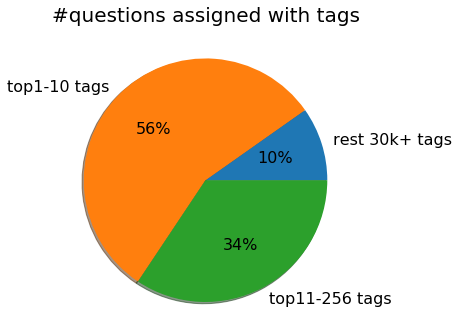

In [13]:
df = pd.DataFrame({
    'tag': ['top1-10 tags', 'top11-256 tags', 'rest 30k+ tags'],
    'questions': [tag10coverage, tag256coverage-tag10coverage, qnum-tag256coverage]})
sums = df.questions.groupby(df.tag).sum()
axis('equal');
plt.title('#questions assigned with tags\n\n', fontsize=20)
plt.pie(sums, labels=sums.index, autopct='%1.0f%%', radius=1.4, shadow=True, textprops={'fontsize': 16});
show()